# Логистическая регрессия

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv).
На основе набора данных об измерениях роста и веса решим следующую задачу.

1. Обучим модель логистической регресси на данных, используя в качестве целевой переменной пол (sex), а в качестве признаков рост и вес (height, weight). Для обучения будем использовать класс из библиотеки scikit-learn - [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
2. Изобразим точки выборки и разделяющую поверхность.
3. Оценим точность и полноту полученного решения и построим график ROC кривой.
4. Расширим пространство признаков квадратичными признаками.
5. Изобразим точки выборки и разделяющую поверхность.
6. Оценим точность и полноту полученного решения и построим график ROC кривой.

В некоторых строках встречаются пропуски. Будем удалять их из таблицы вместе со всей строкой с помощью метода [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html).

In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
ds.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


## Задание

1. Обучите модель логистической регресси на данных, используя в качестве целевой переменной пол (sex), а в качестве признаков рост и вес (height, weight).
2. Нарисуйте точки выборки и разделяющую поверхость.
2. Оцените точность и полноту полученного решения и постройте график ROC кривой
3. Расширьте простарнство признаков квадратичными признаками.
2. Нарисуйте точки выборки и разделяющую поверхость.
2. Оцените точность и полноту полученного решения и постройте график ROC кривой

In [3]:
random_point = 3 # For representation

In [4]:
# Using logistic regression for the prediction of human sex
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
# Deliting NaN-values
df = df.dropna()
df

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
195,F,62,164,61.0,161.0
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
199,M,90,181,91.0,178.0


In [5]:
X = df.loc[:, ['height', 'weight']]
y = df.replace('M', 1).replace('F', 0).loc[:, 'sex']
# Dividing the total sample into training and test samples
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = random_point)

In [6]:
x_train

,height,weight
119,169,75
58,183,73
28,166,58
84,167,60
115,167,76
...,...,...
22,170,61
1,182,77
142,163,52
166,159,59


In [7]:
log_reg = LogisticRegression(random_state = random_point).fit(x_train, y_train)
y_predict = log_reg.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
print("MSE =", mse)
from sklearn.metrics import recall_score
print("Recall: ", recall_score(y_test, y_predict))
from sklearn.metrics import precision_score
print("Precision: ", precision_score(y_test, y_predict))
# Getting weights of model
coef = log_reg.densify().coef_[0] 
coef = np.append(coef, log_reg.intercept_)
print("B0 =", coef[2], "; B1 =", coef[0], "; B2 =", coef[1])

MSE = 0.03636363636363636
Recall:  0.95
Precision:  0.95
B0 = -51.915430259280974 ; B1 = 0.2571384047007678 ; B2 = 0.12140968896343883


AUC (ROC-curve) = 0.99


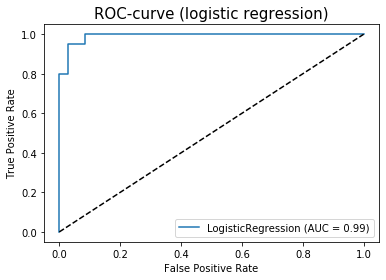

In [8]:
# Building a ROC-curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

logreg_y_proba = log_reg.predict_proba(x_test)[:, 1]

disp = plot_roc_curve(log_reg, x_test, y_test)
disp.ax_.plot([0, 1], [0, 1], 'k--');
disp.ax_.set_title('ROC-curve (logistic regression)', fontsize = 15)
print('AUC (ROC-curve) = %.2f' % roc_auc_score(y_test, logreg_y_proba))

In [9]:
# Forming a dividing line
w = np.arange(min(X['weight']), max(X['weight']), 0.5)
h = np.arange(min(X['height']), max(X['height']), 0.5)
w_plot = []
h_plot = []
eps = 0.01
for w_l in w:
    for h_l in h:
        if ((coef[2] + coef[0] * h_l + coef[1] * w_l) < eps) and ((coef[2] + coef[0] * h_l + coef[1] * w_l) > -eps):
            w_plot.append(w_l)
            h_plot.append(h_l)

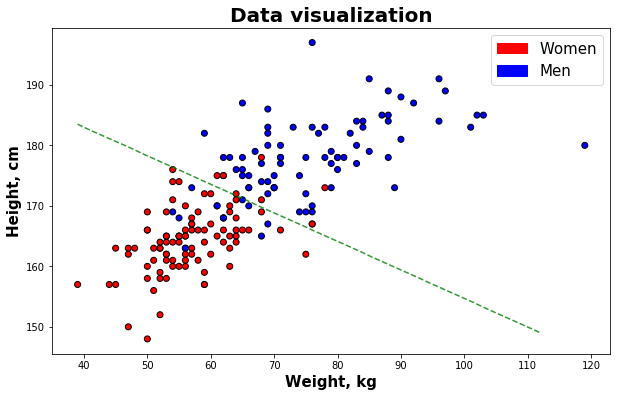

In [10]:
# Data visualization 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(10, 6))
colors = y.map({0: 'r', 1: 'b'})
plt.scatter(X['weight'], X['height'], c=colors, edgecolors = 'black')
red_patch = mpatches.Patch(color='red', label='Women')
blue_patch = mpatches.Patch(color='blue', label='Men')
plt.legend(handles=[red_patch, blue_patch], fontsize = 15)
plt.title('Data visualization', fontsize = 20, fontweight="bold")
plt.xlabel('Weight, kg', fontsize = 15, fontweight="bold")
plt.ylabel('Height, cm', fontsize = 15, fontweight="bold")
plt.plot(w_plot, h_plot, color="green", alpha=0.8, linestyle='--')
plt.show()

In [11]:
# Expanding the feature space
df['weight^2'] = df['weight'] * df['weight']
df['weight*height'] = df['height'] * df['weight']
df['height^2'] = df['height'] * df['height']
X_expanded = df.loc[:, ['height', 'weight', 'weight^2', 'weight*height', 'height^2']]
x_train_expanded, x_test_expanded, y_train_expanded, y_test_expanded = train_test_split(X_expanded, y, test_size= 0.3, random_state= random_point)
X_expanded.head()

,height,weight,weight^2,weight*height,height^2
1,182,77,5929,14014,33124
2,161,58,3364,9338,25921
3,161,53,2809,8533,25921
4,177,68,4624,12036,31329
5,157,59,3481,9263,24649


In [12]:
log_reg = LogisticRegression(random_state = random_point).fit(x_train_expanded, y_train_expanded)
y_predict_expanded = log_reg.predict(x_test_expanded)
mse = mean_squared_error(y_test_expanded, y_predict_expanded)
print("MSE =", mse)
from sklearn.metrics import recall_score
print("Recall: ", recall_score(y_test_expanded, y_predict_expanded))
from sklearn.metrics import precision_score
print("Precision: ", precision_score(y_test_expanded, y_predict_expanded))
# Getting weights of model
coef = log_reg.densify().coef_[0] 
coef = np.append(coef, log_reg.intercept_)
print("B0 = %.3f" % coef[5], "; B1 = %.3f" % coef[0], "; B2 =%.3f" % coef[1], \
      "; B3 =%.3f" % coef[2], "; B4 =%.3f" % coef[3], "; B5 =%.3f" % coef[4])

MSE = 0.03636363636363636
Recall:  0.95
Precision:  0.95
B0 = -0.003 ; B1 = -0.270 ; B2 =-0.099 ; B3 =-0.001 ; B4 =0.002 ; B5 =0.001


AUC (ROC-curve) = 0.99


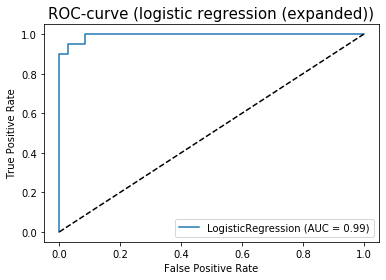

In [13]:
# Building a ROC-curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

logreg_y_proba = log_reg.predict_proba(x_test_expanded)[:, 1]

disp = plot_roc_curve(log_reg, x_test_expanded, y_test_expanded)
disp.ax_.plot([0, 1], [0, 1], 'k--');
disp.ax_.set_title('ROC-curve (logistic regression (expanded))', fontsize = 15)
print('AUC (ROC-curve) = %.2f' % roc_auc_score(y_test_expanded, logreg_y_proba))

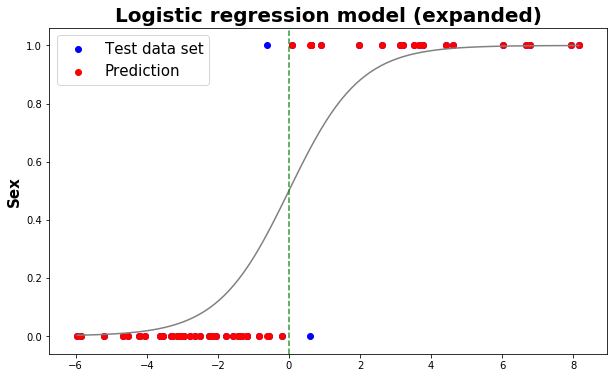

In [14]:
# Data visualization 
plt.figure(figsize=(10, 6))
# Reduction of the dimensionality
p1 = plt.scatter(x_test_expanded['height'].values * coef[0] + x_test_expanded['weight'].values * coef[1] + \
                 x_test_expanded['weight^2'].values * coef[2] + x_test_expanded['weight*height'].values * coef[3] + \
                 x_test_expanded['height^2'].values * coef[4] + coef[5], y_test_expanded, c = 'blue')
p2 = plt.scatter(x_test_expanded['height'].values * coef[0] + x_test_expanded['weight'].values * coef[1] + \
                 x_test_expanded['weight^2'].values * coef[2] + x_test_expanded['weight*height'].values * coef[3] + \
                 x_test_expanded['height^2'].values * coef[4] + coef[5], y_predict_expanded, c = 'red')
import math
# Building logistic function
x_logit = x_test_expanded['height'].values * coef[0] + x_test_expanded['weight'].values * coef[1] + \
          x_test_expanded['weight^2'].values * coef[2] + x_test_expanded['weight*height'].values * coef[3] + \
          x_test_expanded['height^2'].values * coef[4] + coef[5]
x_logit = np.linspace(min(x_logit), max(x_logit), 100)
def logit (x_logit):
    return 1/(1+math.exp(-(x_logit)))
p = []
for i in x_logit:
    p.append(logit(i))
plt.plot(x_logit, p, color = 'grey')
# Drawing a dividing line
plt.axvline(x=0, color="green", alpha=0.8, linestyle='--')
plt.legend((p1, p2), ("Test data set", "Prediction"), fontsize = 15)
plt.title('Logistic regression model (expanded)', fontsize = 20, fontweight="bold")
plt.ylabel('Sex', fontsize = 15, fontweight="bold")
plt.show()